# Importing relevant packages
<ul>
    <li>Kmeans is a clustering algorithm provided by Scikit-Learn, which can be used for grouping data points into clusters based on their similarity</li>
    <li>Validators is to ensure that if the tweet is just a URL to not translate it.</li>
    <li>Other packages like demoji,WordNetLemmatizer is for pre-processing </li>
</ul>

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import ast
import validators
import string
import demoji
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.cluster import KMeans
from nltk.stem import WordNetLemmatizer

# Converting data frame to documents


In [13]:
def DFToDocument(df):
    document = []
    lemmatizer = WordNetLemmatizer()
    stop_words = set(stopwords.words('english'))
    for i, row in df.iterrows():
        sentence = ""
        tokenized_text = ast.literal_eval(row['tokenized_text'])
        for token in tokenized_text:
            if token not in stop_words and not validators.url(token) and token not in string.punctuation:
                sentence += token + ' '
        sentence = demoji.replace_with_desc(string = sentence, sep = ":")
        document.append(sentence[:-1])
    return document

In [14]:
df = pd.read_csv('translated_tokenized/translated_dataframe.csv')
DFsplit = np.array_split(df, 300)
DFsplitFinal = np.array_split(df, 6)

In [24]:
document = DFToDocument(DFsplit[0])
vectorizer = CountVectorizer()
x = vectorizer.fit_transform(document).toarray()

# Elbow Method 
Calculate SSE and Plot graph

/Users/eileengoh/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/eileengoh/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/eileengoh/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/eileengoh/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warning

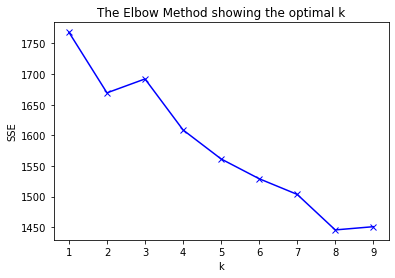

In [25]:
SSE = []
K = range(1,10)    
# Create a KMeans object with desired number of clusters
for k in K:
    model_i = KMeans(n_clusters=k, random_state=99)
    model_i.fit(x)
    SSE.append(model_i.inertia_)

# Plot the elbow
import matplotlib.pyplot as plt
plt.plot(K, SSE, 'bx-')
plt.xlabel('k')
plt.ylabel('SSE')
plt.title('The Elbow Method showing the optimal k')
plt.show()

# Silhouette Scores
A measure used to evaluate the quality of clustering results, to quantify how similar an object is to its own cluster compared to other clusters

In [19]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, adjusted_rand_score

all_score = 0

for i in range(2,15):

    # Initialize KMeans object with 4 clusters
    kmeans = KMeans(n_clusters=i)

    # Fit the data to the KMeans model
    kmeans.fit(x)

    # Get the Silhouette score
    silhouette_score_value = silhouette_score(x, kmeans.labels_)
    all_score += silhouette_score_value


    # Print the Silhouette score
    print(f"For {i} clusters, The Silhouette Score:", silhouette_score_value)
average_score = all_score/13
print(f"Average score from cluster 2-14: {average_score}")

/Users/eileengoh/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/eileengoh/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/eileengoh/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/eileengoh/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warning

For 2 clusters, The Silhouette Score: 0.2819268722012063
For 3 clusters, The Silhouette Score: 0.32971233090829527
For 4 clusters, The Silhouette Score: 0.20454566637128163
For 5 clusters, The Silhouette Score: 0.09175517455217333
For 6 clusters, The Silhouette Score: 0.18477824164214995
For 7 clusters, The Silhouette Score: -0.035083087193598775
For 8 clusters, The Silhouette Score: 0.18648772284374573
For 9 clusters, The Silhouette Score: -0.01629777587261548
For 10 clusters, The Silhouette Score: 0.0729435717293391
For 11 clusters, The Silhouette Score: -0.10971928563898758
For 12 clusters, The Silhouette Score: 0.0906134094115759
For 13 clusters, The Silhouette Score: -0.07067606016766596


/Users/eileengoh/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/eileengoh/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/eileengoh/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/eileengoh/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warning

For 14 clusters, The Silhouette Score: -0.02047371490729501
Average score from cluster 2-14: 0.09157792814458493


/Users/eileengoh/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
